<a href="https://colab.research.google.com/github/brunod02/Analisis-evasion-clientes/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [1]:
import pandas as pd

In [2]:
json_raw = pd.read_json('TelecomX_Data.json')
json_raw.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [3]:
import pandas as pd
import json

# 1. Cargar el archivo JSON
with open('TelecomX_Data.json', 'r') as f:
    data = json.load(f)

# 2. Normalizar los datos
# Esta función aplana las claves anidadas (ej. 'customer' -> 'customer.gender')
df = pd.json_normalize(data)

# 3. Revisar el resultado
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#📊 Carga y análisis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [5]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [6]:
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

mask_tenure0 = df['customer.tenure'] == 0
df.loc[mask_tenure0, 'account.Charges.Total'] = 0

df['account.Charges.Total'].isna().sum()

np.int64(0)

In [7]:
dup_customer = df['customerID'].duplicated().sum()
dup_customer

np.int64(0)

In [8]:
df = df[df['Churn'].isin(['Yes', 'No'])].copy()
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

#Creación columna 'Cuenta diaria'

In [10]:
df['cuenta_diaria'] = df['account.Charges.Monthly'] /30

df['cuenta_diaria']

,cuenta_diaria
0,2.186667
1,1.996667
2,2.463333
3,3.266667
4,2.796667
...,...
7262,1.838333
7263,2.836667
7264,1.676667
7265,2.261667


#**Analisis descriptivo**

In [11]:
df[['customer.tenure','account.Charges.Monthly','account.Charges.Total','cuenta_diaria']].describe()

,customer.tenure,account.Charges.Monthly,account.Charges.Total,cuenta_diaria
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,2.158723
std,24.559481,30.090047,2266.794470,1.003002
min,0.000000,18.250000,0.000000,0.608333
25%,9.000000,35.500000,398.550000,1.183333
50%,29.000000,70.350000,1394.550000,2.345000
75%,55.000000,89.850000,3786.600000,2.995000
max,72.000000,118.750000,8684.800000,3.958333


#Distribución de churn

In [12]:
churn_pct = df['Churn'].value_counts(normalize=True) * 100
churn_pct

,proportion
Churn,
No,73.463013
Yes,26.536987


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

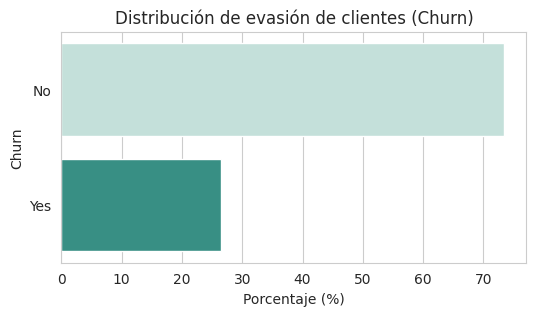

In [14]:
sns.set_style("whitegrid")

plt.figure(figsize=(6,3))
ax = sns.barplot(
    data=churn_pct.reset_index(),
    y='Churn',
    x='proportion',
    orient='h',
    hue='Churn',
    palette={
        'No': '#BFE5DC',
        'Yes': '#2A9D8F'
    },
    legend=False
)

plt.title('Distribución de evasión de clientes (Churn)')
plt.xlabel('Porcentaje (%)')
plt.ylabel('Churn')

plt.show()

#Recuento de evasión por variables categóricas

## Churn por tipo de contacto

In [31]:
churn_contacto = df.groupby('account.Contract')['Churn'].value_counts(normalize=True)*100
churn_contacto = churn_contacto.reset_index()
churn_contacto

,account.Contract,Churn,proportion
0,Month-to-month,No,57.290323
1,Month-to-month,Yes,42.709677
2,One year,No,88.730482
3,One year,Yes,11.269518
4,Two year,No,97.168142
5,Two year,Yes,2.831858


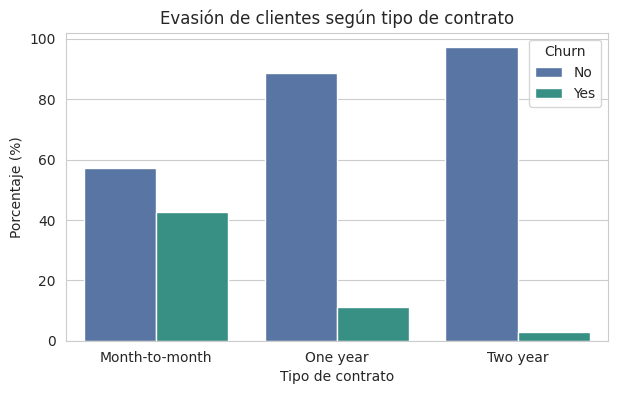

In [39]:
plt.figure(figsize=(7,4))

ax = sns.barplot(
    data=churn_contacto,
    x='account.Contract',
    y='proportion',
    hue='Churn',
    palette={
        'No': '#4C72B0',
        'Yes': '#2A9D8F'
    }
)

plt.title('Evasión de clientes según tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Porcentaje (%)')
plt.show()

## Churn por género

In [36]:
churn_genero = df.groupby('customer.gender')['Churn'].value_counts(normalize=True)*100
churn_genero = churn_genero.reset_index()
churn_genero

,customer.gender,Churn,proportion
0,Female,No,73.079128
1,Female,Yes,26.920872
2,Male,No,73.839662
3,Male,Yes,26.160338


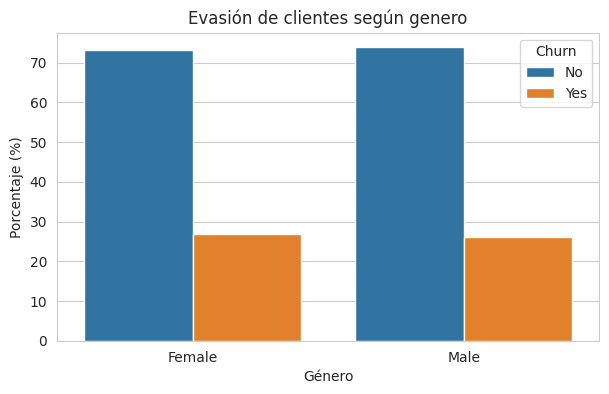

In [38]:
plt.figure(figsize=(7,4))

ax = sns.barplot(
    data=churn_genero,
    x='customer.gender',
    y='proportion',
    hue='Churn',
)

plt.title('Evasión de clientes según genero')
plt.xlabel('Género')
plt.ylabel('Porcentaje (%)')
plt.show()

## Churn por metodo de pago

In [41]:
churn_pago = df.groupby('account.PaymentMethod')['Churn'].value_counts(normalize=True)*100
churn_pago = churn_pago.reset_index()
churn_pago

,account.PaymentMethod,Churn,proportion
0,Bank transfer (automatic),No,83.290155
1,Bank transfer (automatic),Yes,16.709845
2,Credit card (automatic),No,84.756899
3,Credit card (automatic),Yes,15.243101
4,Electronic check,No,54.714588
5,Electronic check,Yes,45.285412
6,Mailed check,No,80.893300
7,Mailed check,Yes,19.106700


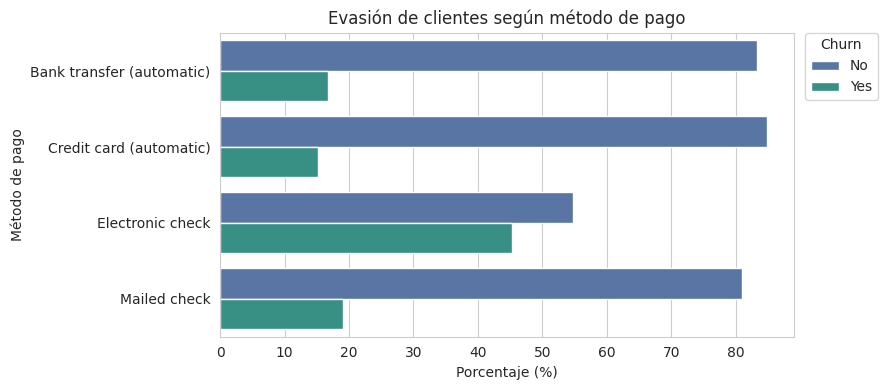

In [43]:
plt.figure(figsize=(9,4))

ax = sns.barplot(
    data=churn_pago,
    y='account.PaymentMethod',
    x='proportion',
    hue='Churn',
    palette={'No': '#4C72B0', 'Yes': '#2A9D8F'}
)

plt.title('Evasión de clientes según método de pago')
plt.xlabel('Porcentaje (%)')
plt.ylabel('Método de pago')

plt.legend(title='Churn', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

# Variables numericas VS Evasión

## Tenure vs churn

In [45]:
df.groupby('Churn')['customer.tenure'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


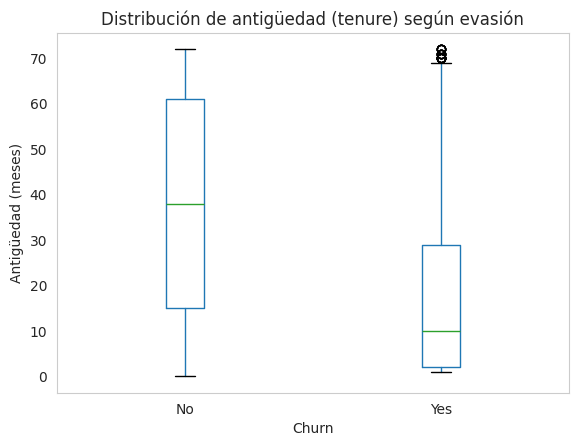

In [46]:
df.boxplot(column='customer.tenure', by='Churn', grid=False)
plt.title('Distribución de antigüedad (tenure) según evasión')
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel('Antigüedad (meses)')
plt.show()

## Cargos mensuales vs Churn

In [47]:
df.groupby('Churn')['account.Charges.Monthly'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
Yes,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


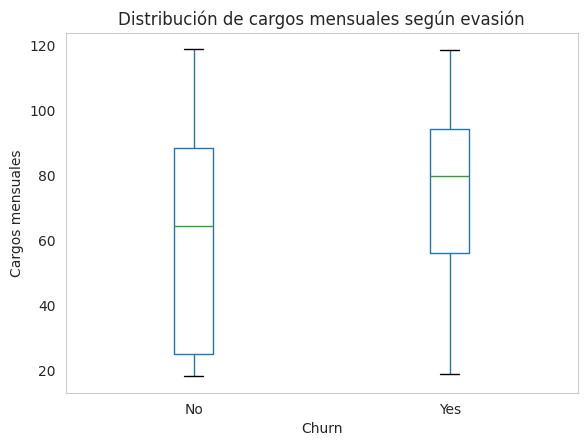

In [48]:
df.boxplot(column='account.Charges.Monthly', by='Churn', grid=False)
plt.title('Distribución de cargos mensuales según evasión')
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel('Cargos mensuales')
plt.show()

## Total gastado vs churn

In [49]:
df.groupby('Churn')['account.Charges.Total'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,2549.911442,2329.954215,0.00,572.9,1679.525,4262.85,8672.45
Yes,1869.0,1531.796094,1890.822994,18.85,134.5,703.550,2331.30,8684.80


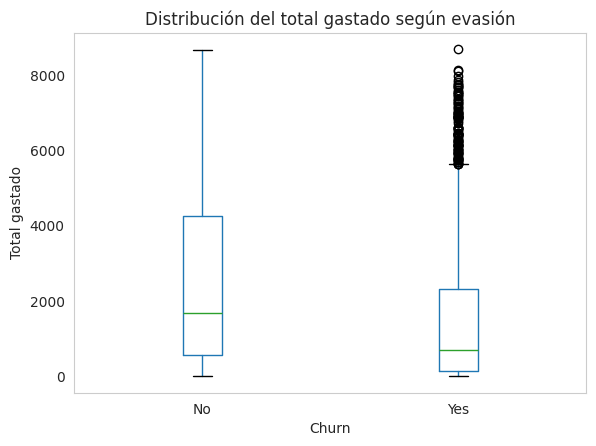

In [50]:
df.boxplot(column='account.Charges.Total', by='Churn', grid=False)
plt.title('Distribución del total gastado según evasión')
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel('Total gastado')
plt.show()


#📄Informe final

# Cierre del proyecto: conclusiones, insights y recomendaciones

## Conclusión General
El análisis de los datos de TelecomX revela que la tasa de abandono de clientes (Churn) es del **26.54%**, lo que indica un desafío significativo en la retención de clientes. Si bien algunas características demográficas como el género no muestran una correlación fuerte con el Churn, factores relacionados con el contrato, el método de pago y el comportamiento de uso del servicio tienen un impacto considerable.

## Insights Clave

### 1. Influencia del Tipo de Contrato
*   **Contratos mes a mes:** Los clientes con contratos mes a mes presentan la tasa de Churn más alta, alcanzando un **42.7%**. Esto sugiere una menor lealtad y mayor flexibilidad para cambiar de proveedor.
*   **Contratos a largo plazo:** En contraste, los contratos de un año tienen una tasa de Churn del **11.3%** y los de dos años una notablemente baja del **2.8%**. Esto subraya la importancia de los compromisos a largo plazo en la retención.

### 2. Impacto del Método de Pago
*   **Cheque electrónico:** Los clientes que utilizan el cheque electrónico como método de pago tienen la tasa de Churn más elevada, con un **45.3%** de probabilidad de abandono. Esto podría indicar insatisfacción con el proceso de pago o una señal de clientes menos comprometidos.
*   **Transferencia bancaria y tarjeta de crédito (automático):** Estos métodos de pago automáticos muestran tasas de Churn significativamente más bajas (16.7% y 15.2% respectivamente), lo que sugiere que la automatización del pago contribuye a la retención.

### 3. Comportamiento y Uso del Servicio
*   **Antigüedad (Tenure):** Los clientes que abandonan el servicio tienen una antigüedad promedio mucho menor (17.98 meses) en comparación con los clientes que se quedan (37.57 meses). Esto indica que el Churn es más frecuente en las primeras etapas de la relación con el cliente.
*   **Cargos Mensuales (Monthly Charges):** Los clientes que se van tienden a tener cargos mensuales promedio ligeramente más altos ($74.44) que los que se quedan ($61.27). Esto podría sugerir una percepción de menor valor por el dinero o una mayor sensibilidad al precio entre los clientes con alto Churn.
*   **Total Gastado (Total Charges):** Coherente con la menor antigüedad, los clientes que abandonan han gastado un total significativamente menor ($1531.80) en comparación con los clientes retenidos ($2549.91).

### 4. Género: No es un Factor Diferenciador
*   La tasa de Churn es casi idéntica entre hombres (**26.2%**) y mujeres (**26.9%**), lo que indica que el género no es un factor significativo en el abandono de clientes para esta compañía.

## Recomendaciones

### 1. Estrategias de Fidelización para Contratos Mes a Mes
*   **Incentivos para la renovación:** Ofrecer descuentos, beneficios exclusivos o mejoras de servicio a los clientes con contratos mes a mes para que migren a planes de un año o dos años. Programas de lealtad que recompensen la permanencia.
*   **Comunicación de valor:** Destacar los beneficios y el valor a largo plazo de los contratos de mayor duración.

### 2. Optimización del Proceso de Pago con Cheque Electrónico
*   **Investigación de causas:** Realizar encuestas o análisis más profundos para entender la insatisfacción específica asociada al método de pago con cheque electrónico.
*   **Promoción de pagos automáticos:** Incentivar a los clientes que usan cheque electrónico a cambiar a métodos de pago automáticos (transferencia bancaria, tarjeta de crédito) mediante pequeños descuentos o facilidades.

### 3. Programas de Retención Temprana
*   **Monitoreo de nuevos clientes:** Identificar y monitorear proactivamente a los clientes con baja antigüedad que muestran signos de insatisfacción.
*   **Programas de onboarding:** Implementar programas de bienvenida sólidos que aseguren que los nuevos clientes entiendan completamente su servicio y reciban soporte adecuado en los primeros meses.
*   **Alertas de Churn:** Desarrollar un modelo predictivo de Churn para identificar clientes de alto riesgo y realizar intervenciones personalizadas (llamadas proactivas, ofertas de retención).

### 4. Evaluación de Precios y Valor Percibido
*   **Análisis de competencia:** Comparar los cargos mensuales con los de la competencia para asegurar que las ofertas de TelecomX sean competitivas, especialmente para clientes con paquetes de mayor costo.
*   **Comunicación de beneficios:** Asegurarse de que los clientes perciban el valor de sus servicios, especialmente aquellos con cargos mensuales más altos, a través de comunicaciones claras sobre las funcionalidades y ventajas incluidas.

Al implementar estas recomendaciones, TelecomX puede mejorar significativamente la retención de clientes y reducir su tasa de Churn.